[4678000.0, 4615500.0, 4590000.0, 4643000.0, 4805500.0, 4628000.0, 2694500.0, 4821000.0, 4320000.000000001, 5000000.0]
[3175, 582, 10800, 12720, 39714, 14599, 25908, 27548, 21818, 27777]


/tmp/ipykernel_27404/1854415744.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]],width=0.3)
/tmp/ipykernel_27404/1854415744.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]],width=0.3)
/tmp/ipykernel_27404/1854415744.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Speed", d

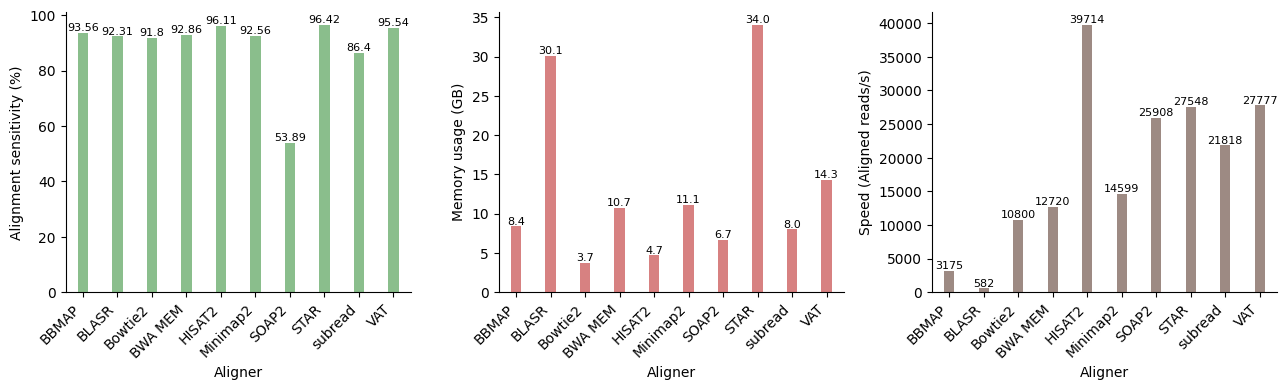

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the table
aligners = ["BBMAP", "BLASR", "Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "SOAP2", "STAR", "subread", "VAT"]
time_s = [1473, 7920, 425, 365, 121, 317, 104, 175, 198, 180]
accuracy = [93.56, 92.31, 91.8, 92.86, 96.11, 92.56, 53.89, 96.42, 86.4, 95.54]
accuracy1 = [93.56, 92.31, 91.8, 92.86, 96.11, 92.56, 53.89, 96.42, 86.4, 100]
memory_gb = [8.4, 30.1, 3.7, 10.7, 4.7, 11.1, 6.7, 34, 8, 14.3]

# memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F"])}
# recall_colors = {aligner: "#81C784" for aligner in aligners}
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


# Define color palette similar to reference image
# memory_colors = ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F"]
# recall_colors = ["#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784"]
# Setting up the figure
# Normalize time (relative to the fastest aligner) to show speed-up fold
# Compute number of aligned reads
num_aligned_reads = [5000000 * (acc / 100) for acc in accuracy1]
print(num_aligned_reads)
# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]
print(speed)
# speed = [t for t in norm_time]  # Higher speed corresponds to a larger bar
# Function to add labels on bars
def add_labels(ax, data, column):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb, "Speed": speed})

def add_labels2(ax, data, column):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)
# df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb, "Speed": speed})

fig, axes = plt.subplots(1, 3, figsize=(13, 4))



# Accuracy plot
ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]],width=0.3)
axes[0].set_ylabel("Alignment sensitivity (%)")
axes[0].set_xlabel("Aligner")
# axes[0].set_title("(b) Alignment Accuracy on Simulated Data")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
# axes[0].spines["left"].set_visible(False)
# axes[0].spines["bottom"].set_visible(False)
add_labels(ax0, df, "Speed-up Fold")
# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]],width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
# axes[1].set_xlabel("Aligner")
# axes[1].set_title("(d) Memory Usage on Simulated Data")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
# Rotate x-axis labels for better readability
add_labels(ax1, df, "Speed-up Fold")

# Speed plot (higher bars indicate faster performance)
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
# axes[2].set_title("(e) Speed Performance on Simulated Data")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
# axes[2].spines["left"].set_visible(False)
# axes[2].spines["bottom"].set_visible(False)
add_labels2(ax2, df, "Speed-up Fold")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/2791140399.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Reads Aligned (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/2791140399.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/2791140399.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Sp

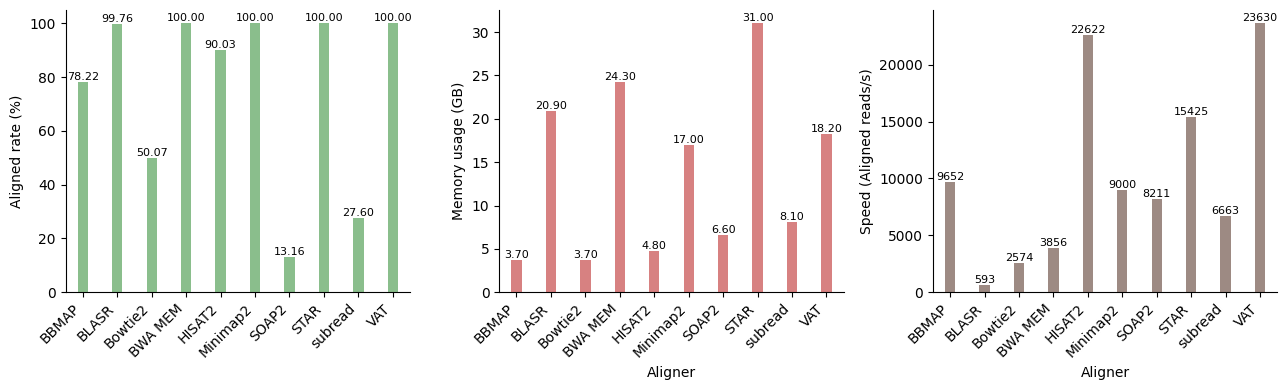

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the real dataset (ERR1341796)
aligners = ["BBMAP", "BLASR", "Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "SOAP2", "STAR", "subread", "VAT"]
time_s = [450, 9338, 1080, 1440, 221, 617, 89, 360, 230, 235]
reads_aligned = [78.22, 99.76, 50.07, 100, 90.03, 100, 13.16, 100, 27.6, 100]
memory_gb = [3.7, 20.9, 3.7, 24.3, 4.8, 17, 6.6, 31, 8.1, 18.2]
recall_colors = ["#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784", "#81C784"]

# # Normalize time (relative to the fastest aligner) to show speed-up fold
# min_time = 235
# norm_speed = [t /min_time for t in time_s]  # Speed-up factor compared to the fastest aligner

num_aligned_reads = [5553208 * (acc / 100) for acc in reads_aligned]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]
# speed = [t for t in norm_time]  # Higher speed corresponds to a larger bar
# Function to add labels on bars
def add_labels(ax, data, column):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)
# df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb, "Speed": speed})

def add_labels2(ax, data, column):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)
# df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb, "Speed": speed})

df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Reads Aligned (%)": reads_aligned, "Memory (GB)": memory_gb, "Speed-up Fold": speed})

# Define color palette similar to reference image
memory_colors = ["#E57373", "#FFB74D", "#81C784", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F"]

# Define color dictionary based on aligners
# memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Function to add labels on bars
def add_labels(ax, data, column):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Reads Aligned plot
ax0 = sns.barplot(x="Aligner", y="Reads Aligned (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Aligned rate (%)")
axes[0].set_xlabel("")
# axes[0].set_title("(b) Reads Aligned on Real Dataset (ERR1341796)")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
# axes[0].spines["left"].set_visible(False)
# axes[0].spines["bottom"].set_visible(False)
add_labels(ax0, df, "Reads Aligned (%)")

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].set_xlabel("Aligner")
# axes[1].set_title("(d) Memory Usage on Real Dataset (ERR1341796)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
# axes[1].spines["left"].set_visible(False)
# axes[1].spines["bottom"].set_visible(False)
add_labels(ax1, df, "Memory (GB)")

# Speed-up plot (higher bars indicate faster performance relative to the slowest aligner)
ax2 = sns.barplot(x="Aligner", y="Speed-up Fold", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
# axes[2].set_title("(e) Speed-up Performance on Real Dataset (ERR1341796)")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
# axes[2].spines["left"].set_visible(False)
# axes[2].spines["bottom"].set_visible(False)
add_labels2(ax2, df, "Speed-up Fold")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/4126337296.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/4126337296.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/4126337296.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Speed",

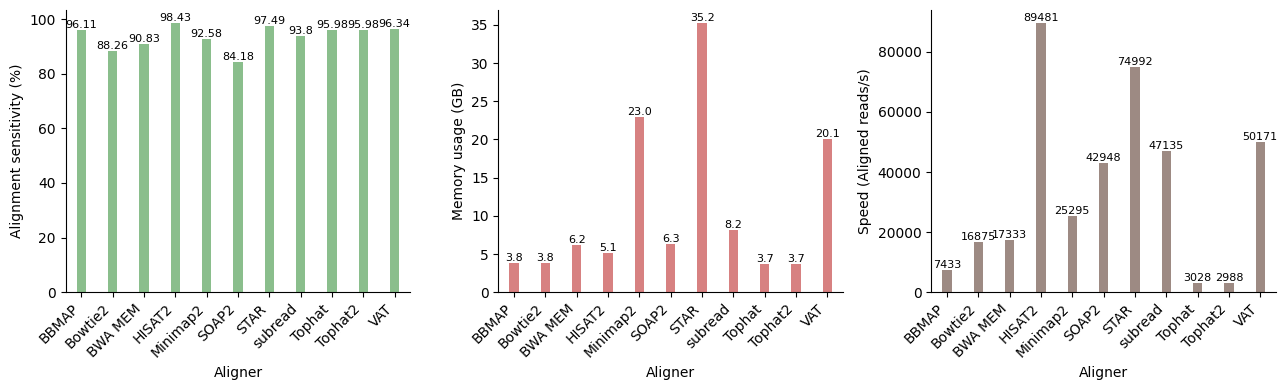

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the spliced mapping dataset (10000000)
aligners = ["BBMAP", "Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "SOAP2", "STAR", "subread", "Tophat", "Tophat2", "VAT"]
time_s = [1293, 523, 524, 110, 366, 196, 130, 199, 3169, 3212, 198]
accuracy = [96.11, 88.26, 90.83, 98.43, 92.58, 84.18, 97.49, 93.8, 95.98, 95.98, 96.34]
accurac1 = [96.11, 88.26, 90.83, 98.43, 92.58, 84.18, 97.49, 93.8, 95.98, 95.98, 99.34]
memory_gb = [3.8, 3.8, 6.2, 5.1, 23, 6.3, 35.2, 8.2, 3.7, 3.7, 20.1]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F", "#FFC107"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}

# Compute number of aligned reads
num_aligned_reads = [int(10000000 * (acc / 100)) for acc in accurac1]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb, "Speed": speed})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Accuracy plot
ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Alignment sensitivity (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels2(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/3464285732.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/3464285732.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/3464285732.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Speed",

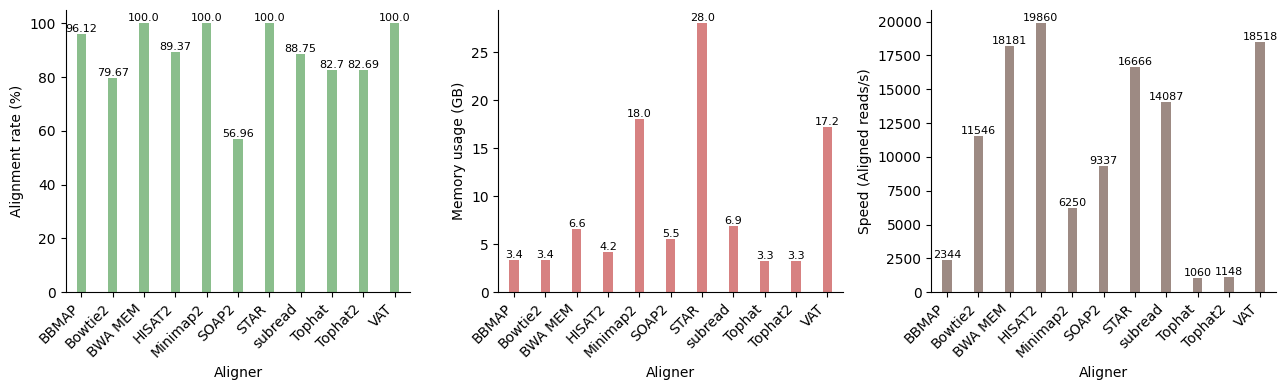

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the spliced mapping on real dataset (1000000)
aligners = ["BBMAP", "Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "SOAP2", "STAR", "subread", "Tophat", "Tophat2", "VAT"]
time_s = [410, 69, 55, 45, 160, 61, 60, 63, 780, 720, 54]
reads_aligned = [96.12, 79.67, 100, 89.37, 100, 56.96, 100, 88.75, 82.7, 82.69, 100]
memory_gb = [3.4, 3.4, 6.6, 4.2, 18, 5.5, 28, 6.9, 3.3, 3.3, 17.2]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F", "#FFC107"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


# Compute number of aligned reads
num_aligned_reads = [int(1000000 * (acc / 100)) for acc in reads_aligned]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": reads_aligned, "Memory (GB)": memory_gb, "Speed": speed})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Accuracy plot
ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Alignment rate (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels2(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_27404/3548550205.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Reads Aligned (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_27404/3548550205.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_27404/3548550205.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Sp

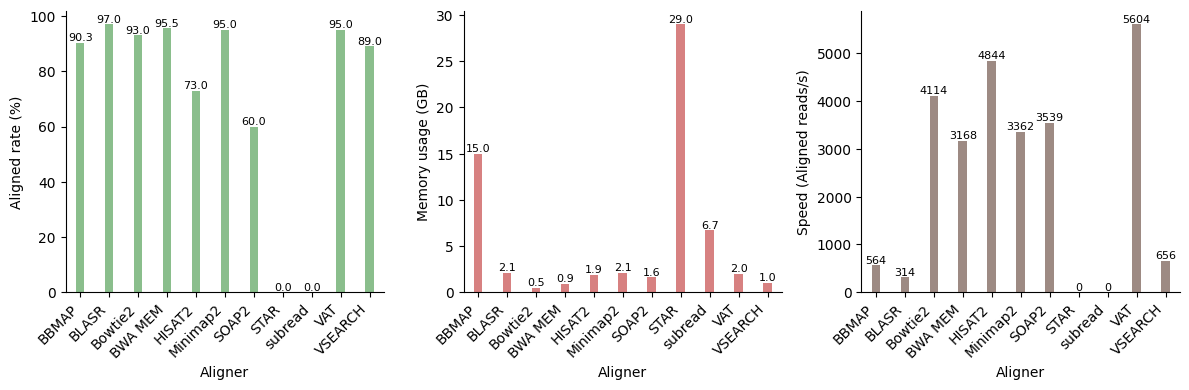

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the short genomic mapping on real 16S rRNA sequencing dataset (53091)
aligners = ["BBMAP", "BLASR", "Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "SOAP2", "STAR", "subread", "VAT", "VSEARCH"]
time_s = [85, 164, 12, 16, 8, 15, 9, 49, 13, 9, 72]
reads_aligned = [90.3, 97, 93, 95.5, 73, 95, 60, 0, 0, 95, 89]
memory_gb = [15, 2.1, 0.5, 0.9, 1.9, 2.1, 1.6, 29, 6.7, 2, 1]
# ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F", "#FFC107"]
# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


# Compute number of aligned reads
num_aligned_reads = [int(53091 * (acc / 100)) for acc in reads_aligned]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Reads Aligned (%)": reads_aligned, "Memory (GB)": memory_gb, "Speed": speed})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Function to add labels on bars
def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Reads Aligned plot
ax0 = sns.barplot(x="Aligner", y="Reads Aligned (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Aligned rate (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels2(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

/tmp/ipykernel_12413/3592501854.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/3592501854.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/3592501854.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Speed",

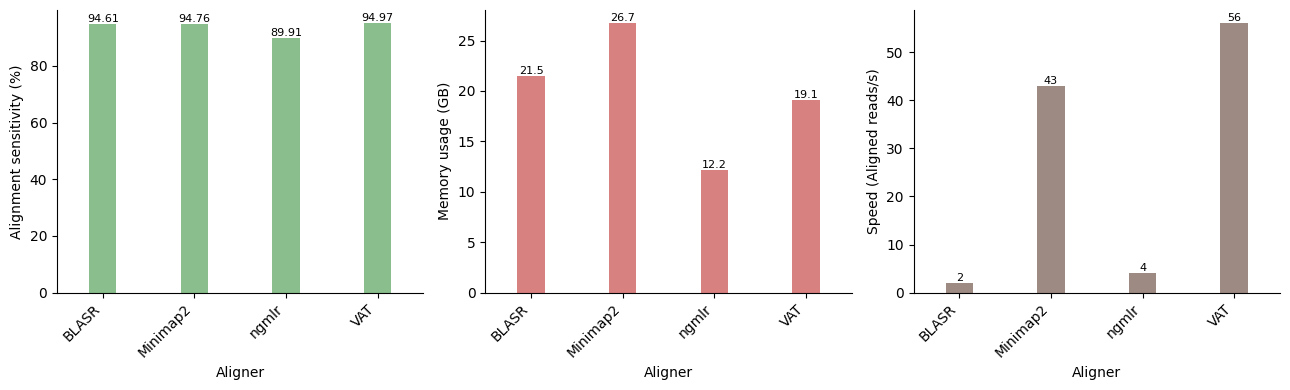

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the long genomic mapping on simulated dataset (10945)
aligners = ["BLASR", "Minimap2", "ngmlr", "VAT"]
time_s = [4620, 241, 2221, 183]
accuracy = [94.61, 94.76, 89.91, 94.97]
memory_gb = [21.5, 26.7, 12.2, 19.1]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


# Compute number of aligned reads
num_aligned_reads = [int(10945 * (acc / 100)) for acc in accuracy]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb, "Speed": speed})
# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Accuracy plot
ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Alignment sensitivity (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels2(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/1963301397.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Reads Aligned (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/1963301397.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/1963301397.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Sp

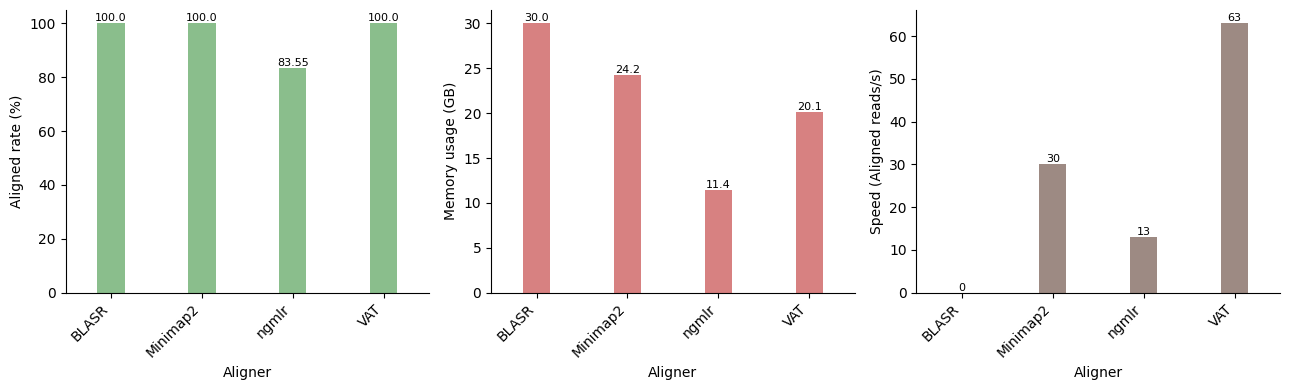

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the long genomic mapping on real dataset (4000)
aligners = ["BLASR", "Minimap2", "ngmlr", "VAT"]
time_s = [4789, 132, 257, 63]
reads_aligned = [100, 100, 83.55, 100]
memory_gb = [30, 24.2, 11.4, 20.1]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


# Compute number of aligned reads
num_aligned_reads = [int(4000 * (acc / 100)) for acc in reads_aligned]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Reads Aligned (%)": reads_aligned, "Memory (GB)": memory_gb, "Speed": speed})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Reads Aligned plot
ax0 = sns.barplot(x="Aligner", y="Reads Aligned (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Aligned rate (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels2(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/1086246092.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/1086246092.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/1086246092.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Speed",

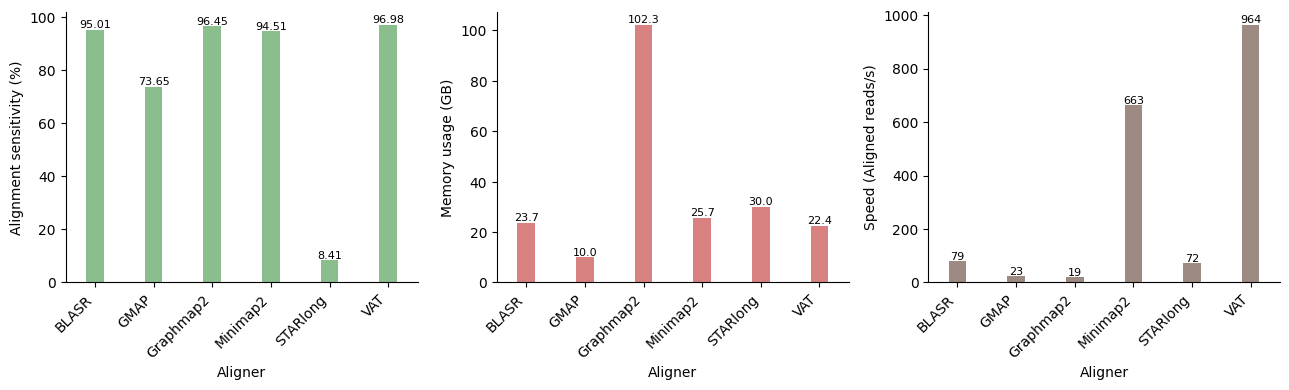

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the long spliced mapping on simulated dataset (416781)
aligners = ["BLASR", "GMAP", "Graphmap2", "Minimap2", "STARlong", "VAT"]
time_s = [4992, 12900, 20460, 594, 482, 419]
accuracy = [95.01, 73.65, 96.45, 94.51, 8.41, 96.98]
memory_gb = [23.7, 10, 102.3, 25.7, 30, 22.4]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


# Compute number of aligned reads
num_aligned_reads = [int(416781 * (acc / 100)) for acc in accuracy]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb, "Speed": speed})
# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Accuracy plot
ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Alignment sensitivity (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels2(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/2510781608.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Reads Aligned (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/2510781608.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/2510781608.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Sp

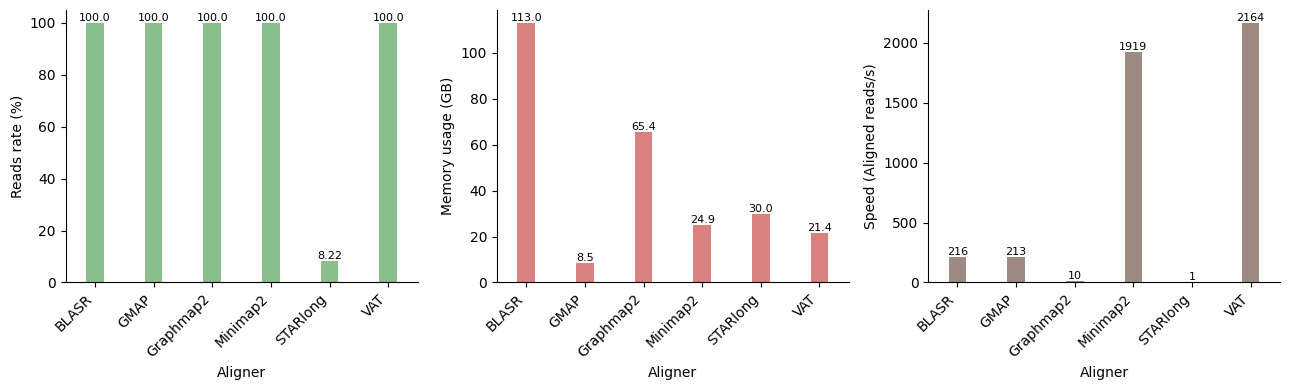

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the long spliced mapping on real dataset (1000000)
aligners = ["BLASR", "GMAP", "Graphmap2", "Minimap2", "STARlong", "VAT"]
time_s = [4620, 4680, 94561, 521, 68400, 462]
reads_aligned = [100, 100, 100, 100, 8.22, 100]
memory_gb = [113, 8.5, 65.4, 24.9, 30, 21.4]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


# Compute number of aligned reads
num_aligned_reads = [int(1000000 * (acc / 100)) for acc in reads_aligned]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Reads Aligned (%)": reads_aligned, "Memory (GB)": memory_gb, "Speed": speed})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Reads Aligned plot
ax0 = sns.barplot(x="Aligner", y="Reads Aligned (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Reads rate (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels2(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/93028551.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/93028551.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/93028551.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Speed", data=

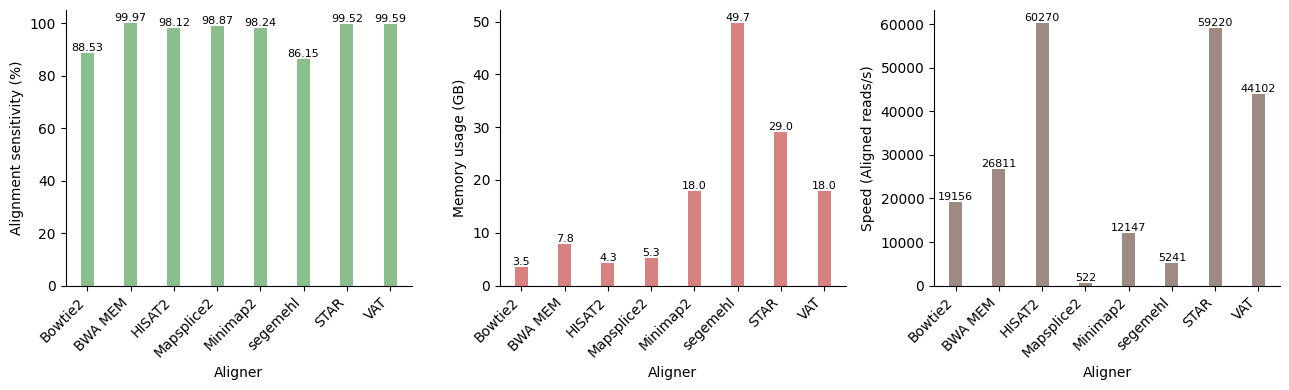

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the CircRNA mapping on simulated dataset (1904196)
aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Mapsplice2", "Minimap2", "segemehl", "STAR", "VAT"]
time_s = [88, 71, 31, 3600, 154, 313, 32, 43]
accuracy = [88.53, 99.97, 98.12, 98.87, 98.24, 86.15, 99.52, 99.59]
memory_gb = [3.5, 7.8, 4.3, 5.3, 18, 49.7, 29, 18]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}


# Compute number of aligned reads
num_aligned_reads = [int(1904196 * (acc / 100)) for acc in accuracy]

# Compute speed as aligned reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb, "Speed": speed})
def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)
# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Accuracy plot
ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Alignment sensitivity (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels2(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

/tmp/ipykernel_12413/3462083615.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(tick/1000)}K" for tick in ax.get_yticks()])


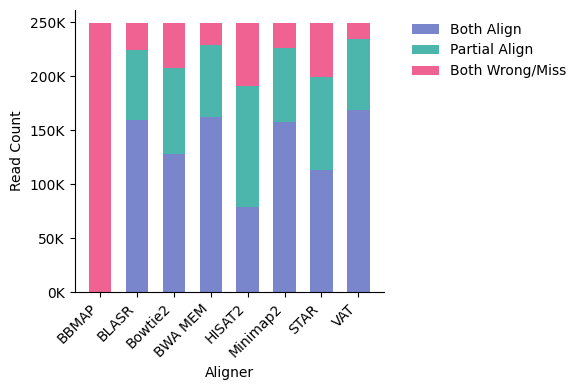

In [17]:
# Re-import necessary libraries due to execution state reset
import matplotlib.pyplot as plt
import numpy as np

# Data from HIC read mapping
aligners = ["BBMAP", "BLASR", "Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]
both_align = np.array([0, 159629, 128136, 161919, 78787, 157488, 113348, 168718])
partial_align = np.array([0, 64793, 79246, 66982, 112273, 69197, 85985, 65893])
both_wrong = np.array([249050, 24628, 41668, 20149, 57990, 22365, 49717, 14439])

# Convert to stacked values
total_reads = both_align + partial_align + both_wrong

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

bar_width = 0.6
x = np.arange(len(aligners))
# # memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F"])}

# Stacked bars
ax.bar(x, both_align, color="#7986CB", label="Both Align", width=bar_width)
ax.bar(x, partial_align, bottom=both_align, color="#4DB6AC", label="Partial Align", width=bar_width)
ax.bar(x, both_wrong, bottom=both_align + partial_align, color="#F06292", label="Both Wrong/Miss", width=bar_width)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(aligners, rotation=45, ha="right")
ax.set_yticklabels([f"{int(tick/1000)}K" for tick in ax.get_yticks()])
ax.set_ylabel("Read Count")
ax.set_xlabel("Aligner")
ax.legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/2013091483.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Aligner", y="Time (s)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]],width=0.3)
/tmp/ipykernel_12413/2013091483.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]],width=0.3)
/tmp/ipykernel_12413/2013091483.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


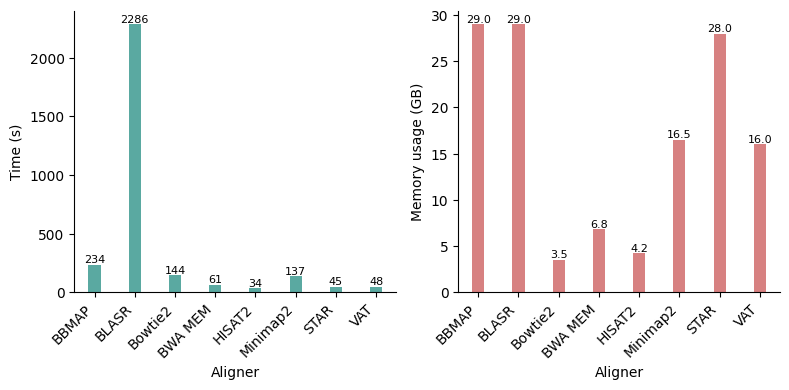

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the table
aligners = ["BBMAP", "BLASR", "Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]
time_s = [234, 2286, 144, 61, 34, 137, 45, 48]
memory_gb = [29, 29, 3.5, 6.8, 4.2, 16.5, 28, 16]


# Define color mappings based on aligners
memory_colors = {aligner: color for aligner, color in zip(aligners, 
    ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292"])}

recall_colors = {aligner: "#4DB6AC" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Time (s)": time_s, "Memory (GB)": memory_gb})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)
def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)
# Create a horizontal bar plot for memory and time with individual colors
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Time plot
sns.barplot(x="Aligner", y="Time (s)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]],width=0.3)
axes[0].set_ylabel("Time (s)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(axes[0])

# Memory usage plot
sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]],width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels2(axes[1])

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/3005002167.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Aligned Rate (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/3005002167.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/3005002167.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Spe

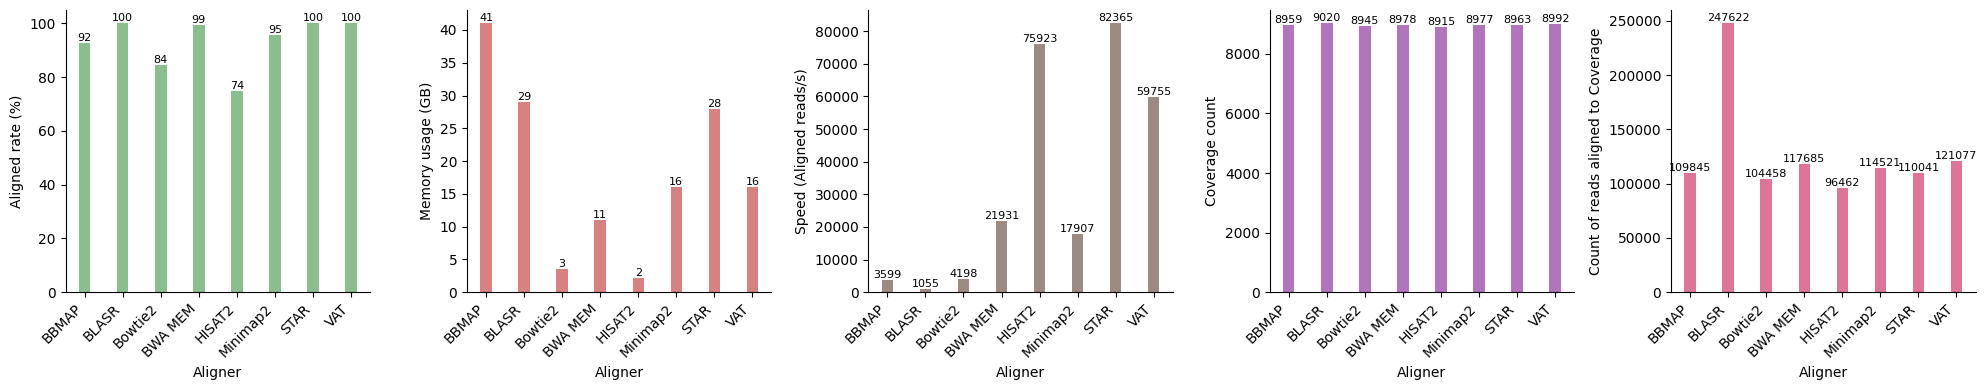

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the new dataset
aligners = ["BBMAP", "BLASR", "Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]
time_s = [786, 2886, 613, 138, 30, 163, 37, 51]
aligned_rate = [92.83, 100, 84.45, 99.31, 74.74, 95.78, 100, 100]
coverage = [8959, 9020, 8945, 8978, 8915, 8977, 8963, 8992]
unique_reads = [109845, 247622, 104458, 117685, 96462, 114521, 110041, 121077]
memory_gb = [41, 29, 3.6, 11, 2.1, 16, 28, 16]

num_aligned_reads = [int(3047520 * (acc / 100)) for acc in aligned_rate]

# Compute speed as unique reads per second
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, 
    ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}

cover_colors = {aligner: color for aligner, color in zip(aligners, ["#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8"])}

al_cover_colors = {aligner: color for aligner, color in zip(aligners, ["#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292"])}


# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Speed (Reads/s)": speed, "Aligned Rate (%)": aligned_rate, "Coverage": coverage, "Memory (GB)": memory_gb,"Reads Aligned to Coverage": unique_reads})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Aligned Rate plot
ax0 = sns.barplot(x="Aligner", y="Aligned Rate (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Aligned rate (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)



# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed (Reads/s)", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels(ax2)

ax3 = sns.barplot(x="Aligner", y="Coverage", data=df, ax=axes[3], palette=[cover_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[3].set_ylabel("Coverage count")
axes[3].grid(False)
axes[3].spines["top"].set_visible(False)
axes[3].spines["right"].set_visible(False)
add_labels(ax3)

ax4 = sns.barplot(x="Aligner", y="Reads Aligned to Coverage", data=df, ax=axes[4], palette=[al_cover_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[4].set_ylabel("Count of reads aligned to Coverage")
axes[4].grid(False)
axes[4].spines["top"].set_visible(False)
axes[4].spines["right"].set_visible(False)
add_labels(ax4)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_12413/3469063532.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/3469063532.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/3469063532.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Speed (

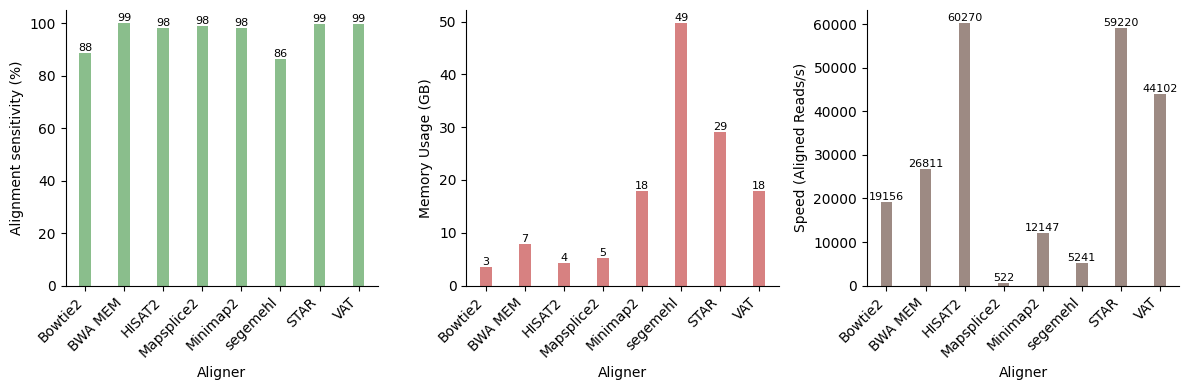

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the CircRNA mapping on simulated dataset (1904196)
aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Mapsplice2", "Minimap2", "segemehl", "STAR", "VAT"]
time_s = [88, 71, 31, 3600, 154, 313, 32, 43]
accuracy = [88.53, 99.97, 98.12, 98.87, 98.24, 86.15, 99.52, 99.59]
memory_gb = [3.5, 7.8, 4.3, 5.3, 18, 49.7, 29, 18]

# Compute speed as aligned reads per second
num_aligned_reads = [int(1904196 * (acc / 100)) for acc in accuracy]
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]

# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, 
    ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}

cover_colors = {aligner: color for aligner, color in zip(aligners, ["#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8"])}

al_cover_colors = {aligner: color for aligner, color in zip(aligners, ["#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292"])}

# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Speed (Reads/s)": speed, "Accuracy (%)": accuracy, "Memory (GB)": memory_gb})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Accuracy plot
ax0 = sns.barplot(x="Aligner", y="Accuracy (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Alignment sensitivity (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory Usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed (Reads/s)", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned Reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels(ax2)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

/tmp/ipykernel_12413/745074116.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Aligned Rate (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/745074116.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
/tmp/ipykernel_12413/745074116.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Speed 

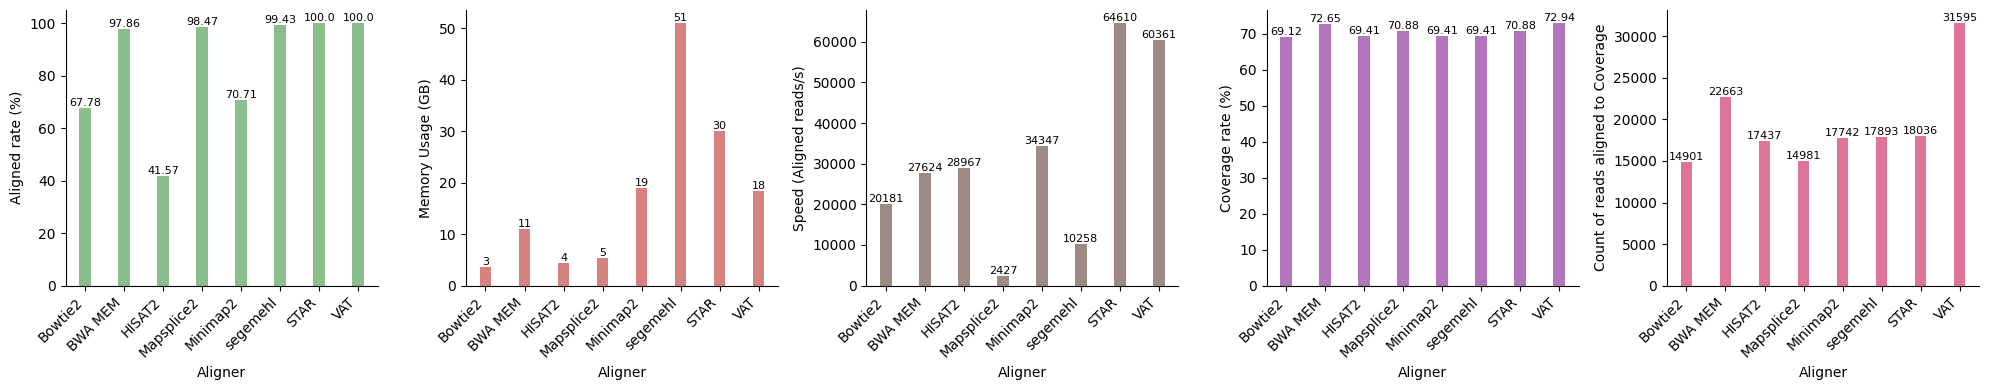

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the CircRNA mapping on real dataset (SRR1636985) (26619490)
aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Mapsplice2", "Minimap2", "segemehl", "STAR", "VAT"]
time_s = [894, 943, 382, 10800, 548, 2580, 412, 441]
aligned_rate = [67.78, 97.86, 41.57, 98.47, 70.71, 99.43, 100, 100]
reads_mapped = [14901, 22663, 17437, 14981, 17742, 17893, 18036, 31595]
coverage = [69.12, 72.65, 69.41, 70.88, 69.41, 69.41, 70.88, 72.94]
memory_gb = [3.6, 11, 4.4, 5.4, 19, 51, 30, 18.3]

# Compute speed as aligned reads per second
num_aligned_reads = [int(26619490 * (acc / 100)) for acc in aligned_rate]
speed = [int(n / t) for n, t in zip(num_aligned_reads, time_s)]


# Define color dictionaries
memory_colors = {aligner: color for aligner, color in zip(aligners, 
    ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292"])}
recall_colors = {aligner: "#81C784" for aligner in aligners}

recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}

cover_colors = {aligner: color for aligner, color in zip(aligners, ["#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8"])}

al_cover_colors = {aligner: color for aligner, color in zip(aligners, ["#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292"])}


# Create DataFrame
df = pd.DataFrame({"Aligner": aligners, "Speed (Reads/s)": speed, "Aligned Rate (%)": aligned_rate, "Coverage": coverage, "Memory (GB)": memory_gb,"Reads Mapped": reads_mapped})

# Function to add labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

def add_labels2(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Setting up the figure
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Aligned Rate plot
ax0 = sns.barplot(x="Aligner", y="Aligned Rate (%)", data=df, ax=axes[0], palette=[recall_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[0].set_ylabel("Aligned rate (%)")
axes[0].set_xlabel("Aligner")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
add_labels2(ax0)

# Memory usage plot
ax1 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[1], palette=[memory_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[1].set_ylabel("Memory Usage (GB)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
add_labels(ax1)

# Speed plot
ax2 = sns.barplot(x="Aligner", y="Speed (Reads/s)", data=df, ax=axes[2], palette=[speed_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[2].set_ylabel("Speed (Aligned reads/s)")
axes[2].set_xlabel("Aligner")
axes[2].grid(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
add_labels(ax2)

# Speed plot
ax3 = sns.barplot(x="Aligner", y="Coverage", data=df, ax=axes[3], palette=[cover_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[3].set_ylabel("Coverage rate (%)")
axes[3].set_xlabel("Aligner")
axes[3].grid(False)
axes[3].spines["top"].set_visible(False)
axes[3].spines["right"].set_visible(False)
add_labels2(ax3)


# Speed plot
ax4 = sns.barplot(x="Aligner", y="Reads Mapped", data=df, ax=axes[4], palette=[al_cover_colors[aligner] for aligner in df["Aligner"]], width=0.3)
axes[4].set_ylabel("Count of reads aligned to Coverage")
axes[4].set_xlabel("Aligner")
axes[4].grid(False)
axes[4].spines["top"].set_visible(False)
axes[4].spines["right"].set_visible(False)
add_labels(ax4)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


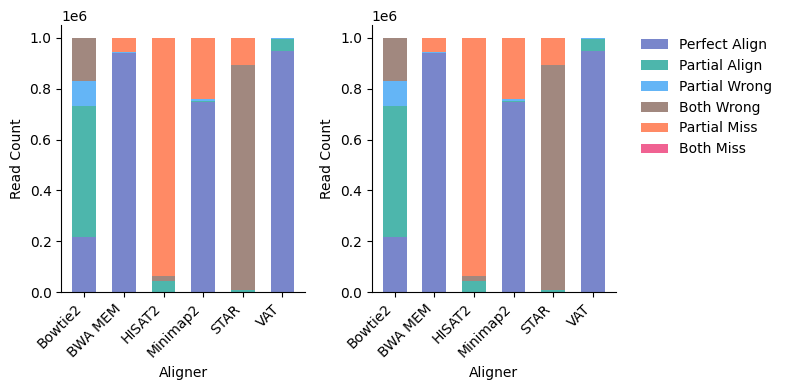

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Chimeric read mapping on simulated dataset (20.noInsert)
aligners = ["Minimap2", "BWA MEM", "Bowtie2", "STAR", "HISAT2", "VAT"]
perfect_noInsert = np.array([746716, 940847, 217927, 0, 1084, 949678])
partial_aligned_noInsert = np.array([6816, 1170, 515259, 8563, 41859, 47625])
partial_wrong_noInsert = np.array([4246, 762, 95765, 0, 1, 623])
both_wrong_noInsert = np.array([2629, 502, 169905, 884303, 18996, 395])
partial_miss_noInsert = np.array([238551, 55677, 102, 106092, 937018, 637])
both_miss_noInsert = np.array([1042, 1042, 1042, 1042, 1042, 1042])

# Data for Chimeric read mapping on simulated dataset (20.Insert)
perfect_insert = np.array([797104, 882327, 174806, 0, 226, 953655])
partial_aligned_insert = np.array([10043, 2258, 528976, 144, 21807, 44417])
partial_wrong_insert = np.array([7090, 707, 79013, 0, 9, 456])
both_wrong_insert = np.array([1947, 3316, 216182, 996888, 310822, 102])
partial_miss_insert = np.array([182808, 110384, 15, 1960, 666137, 362])
both_miss_insert = np.array([1008, 1008, 1008, 1008, 1008, 1008])

# Define the desired order of aligners
sorted_aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]

# Reorder data according to the specified aligner order
aligner_indices = [aligners.index(aligner) for aligner in sorted_aligners]

perfect_noInsert = perfect_noInsert[aligner_indices]
partial_aligned_noInsert = partial_aligned_noInsert[aligner_indices]
partial_wrong_noInsert = partial_wrong_noInsert[aligner_indices]
both_wrong_noInsert = both_wrong_noInsert[aligner_indices]
partial_miss_noInsert = partial_miss_noInsert[aligner_indices]
both_miss_noInsert = both_miss_noInsert[aligner_indices]

perfect_insert = perfect_insert[aligner_indices]
partial_aligned_insert = partial_aligned_insert[aligner_indices]
partial_wrong_insert = partial_wrong_insert[aligner_indices]
both_wrong_insert = both_wrong_insert[aligner_indices]
partial_miss_insert = partial_miss_insert[aligner_indices]
both_miss_insert = both_miss_insert[aligner_indices]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

bar_width = 0.6
x = np.arange(len(sorted_aligners))
# # memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#FFB74D", "#01C780", "#4DB6AC", "#64B5F6", "#7986CB", "#BA68C8", "#F06292", "#FF8A65", "#A1887F"])}

# Stacked bars
# ax.bar(x, both_align, color="#7986CB", label="Both Align", width=bar_width)
# ax.bar(x, partial_align, bottom=both_align, color="#4DB6AC", label="Partial Align", width=bar_width)
# ax.bar(x, both_wrong, bottom=both_align + partial_align, color="#F06292", label="Both Wrong/Miss", width=bar_width)

# Stacked bars for 20.noInsert
axes[0].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[0].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[0].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[0].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[0].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[0].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[0].set_xticks(x)
axes[0].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[0].set_ylabel("Read Count")
axes[0].set_xlabel("Aligner")
# axes[0].set_title("Chimeric Read Mapping (20.noInsert)")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

# Stacked bars for 20.Insert
axes[1].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[1].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[1].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[1].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[1].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[1].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[1].set_xticks(x)
axes[1].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[1].set_ylabel("Read Count")
axes[1].set_xlabel("Aligner")
# axes[1].set_title("Chimeric Read Mapping (20.Insert)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].tick_params(labelleft=True)

# Move legend outside
axes[1].legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

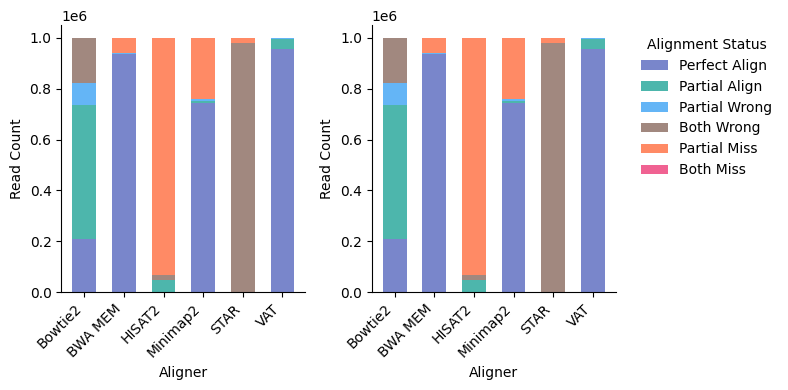

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Chimeric read mapping on simulated dataset (18.noInsert)
aligners = ["Minimap2", "BWA MEM", "Bowtie2", "STAR", "HISAT2", "VAT"]
perfect_noInsert = np.array([745689, 936872, 207622, 0, 1106, 957066])
partial_aligned_noInsert = np.array([7234, 1216, 526679, 2467, 45464, 40167])
partial_wrong_noInsert = np.array([4963, 1792, 87464, 0, 1, 739])
both_wrong_noInsert = np.array([3287, 782, 177603, 975580, 22914, 454])
partial_miss_noInsert = np.array([238289, 58800, 94, 21415, 929977, 1036])
both_miss_noInsert = np.array([538, 538, 538, 538, 538, 538])

# Data for Chimeric read mapping on simulated dataset (18.Insert)
perfect_insert = np.array([787771, 885671, 171676, 0, 177, 959307])
partial_aligned_insert = np.array([9377, 1908, 534028, 0, 17626, 38760])
partial_wrong_insert = np.array([7418, 1727, 77423, 0, 3, 556])
both_wrong_insert = np.array([2584, 3291, 216300, 999455, 449433, 252])
partial_miss_insert = np.array([192305, 106858, 28, 0, 532216, 580])
both_miss_insert = np.array([545, 545, 545, 545, 545, 545])

# Define the desired order of aligners
sorted_aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]

# Reorder data according to the specified aligner order
aligner_indices = [aligners.index(aligner) for aligner in sorted_aligners]

perfect_noInsert = perfect_noInsert[aligner_indices]
partial_aligned_noInsert = partial_aligned_noInsert[aligner_indices]
partial_wrong_noInsert = partial_wrong_noInsert[aligner_indices]
both_wrong_noInsert = both_wrong_noInsert[aligner_indices]
partial_miss_noInsert = partial_miss_noInsert[aligner_indices]
both_miss_noInsert = both_miss_noInsert[aligner_indices]

perfect_insert = perfect_insert[aligner_indices]
partial_aligned_insert = partial_aligned_insert[aligner_indices]
partial_wrong_insert = partial_wrong_insert[aligner_indices]
both_wrong_insert = both_wrong_insert[aligner_indices]
partial_miss_insert = partial_miss_insert[aligner_indices]
both_miss_insert = both_miss_insert[aligner_indices]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

bar_width = 0.6
x = np.arange(len(sorted_aligners))

# Stacked bars for 18.noInsert
axes[0].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[0].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[0].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[0].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[0].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[0].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[0].set_xticks(x)
axes[0].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[0].set_ylabel("Read Count")
axes[0].set_xlabel("Aligner")
# axes[0].set_title("Chimeric Read Mapping (20.noInsert)")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

# Stacked bars for 20.Insert
axes[1].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[1].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[1].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[1].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[1].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[1].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[1].set_xticks(x)
axes[1].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[1].set_ylabel("Read Count")
axes[1].set_xlabel("Aligner")
# axes[1].set_title("Chimeric Read Mapping (20.Insert)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].tick_params(labelleft=True)


# Move legend outside without border
legend = axes[1].legend(title="Alignment Status", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


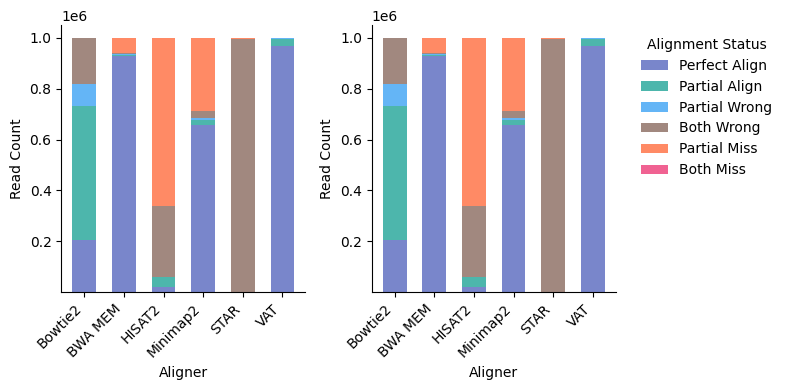

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Chimeric read mapping on simulated dataset (15.noInsert)
aligners = ["Minimap2", "BWA MEM", "Bowtie2", "STAR", "HISAT2", "VAT"]
perfect_noInsert = np.array([655756, 929531, 204536, 2, 20911, 968301])
partial_aligned_noInsert = np.array([20351, 1707, 529002, 904, 39743, 29200])
partial_wrong_noInsert = np.array([8947, 6365, 86881, 0, 25, 760])
both_wrong_noInsert = np.array([27868, 1119, 179270, 992916, 278211, 206])
partial_miss_noInsert = np.array([286821, 61021, 54, 5921, 660853, 1276])
both_miss_noInsert = np.array([257, 257, 257, 257, 257, 257])

# Data for Chimeric read mapping on simulated dataset (15.Insert)
perfect_insert = np.array([716371, 878051, 179213, 1, 1006, 969428])
partial_aligned_insert = np.array([22616, 2166, 531338, 4, 9802, 28635])
partial_wrong_insert = np.array([11282, 6887, 80488, 0, 22, 668])
both_wrong_insert = np.array([16440, 3593, 208696, 999730, 836730, 120])
partial_miss_insert = np.array([233045, 109057, 19, 19, 152194, 903])
both_miss_insert = np.array([246, 246, 246, 246, 246, 246])

# Define the desired order of aligners
sorted_aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]

# Reorder data according to the specified aligner order
aligner_indices = [aligners.index(aligner) for aligner in sorted_aligners]

perfect_noInsert = perfect_noInsert[aligner_indices]
partial_aligned_noInsert = partial_aligned_noInsert[aligner_indices]
partial_wrong_noInsert = partial_wrong_noInsert[aligner_indices]
both_wrong_noInsert = both_wrong_noInsert[aligner_indices]
partial_miss_noInsert = partial_miss_noInsert[aligner_indices]
both_miss_noInsert = both_miss_noInsert[aligner_indices]

perfect_insert = perfect_insert[aligner_indices]
partial_aligned_insert = partial_aligned_insert[aligner_indices]
partial_wrong_insert = partial_wrong_insert[aligner_indices]
both_wrong_insert = both_wrong_insert[aligner_indices]
partial_miss_insert = partial_miss_insert[aligner_indices]
both_miss_insert = both_miss_insert[aligner_indices]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

bar_width = 0.6
x = np.arange(len(sorted_aligners))

# Stacked bars for 15.noInsert
axes[0].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[0].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[0].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[0].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[0].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[0].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[0].set_xticks(x)
axes[0].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[0].set_ylabel("Read Count")
axes[0].set_xlabel("Aligner")
# axes[0].set_title("Chimeric Read Mapping (20.noInsert)")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

# Stacked bars for 20.Insert
axes[1].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[1].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[1].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[1].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[1].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[1].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[1].set_xticks(x)
axes[1].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[1].set_ylabel("Read Count")
axes[1].set_xlabel("Aligner")
# axes[1].set_title("Chimeric Read Mapping (20.Insert)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].tick_params(labelleft=True)


# Move legend outside without border
legend = axes[1].legend(title="Alignment Status", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

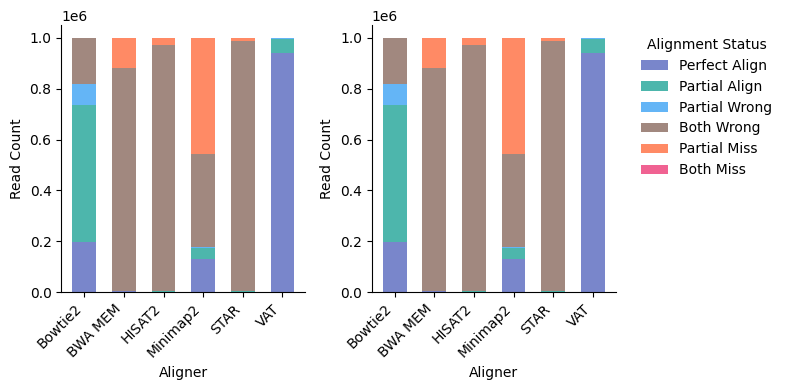

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Chimeric read mapping on simulated dataset (12.noInsert)
aligners = ["Minimap2", "BWA MEM", "Bowtie2", "STAR", "HISAT2", "VAT"]
perfect_noInsert = np.array([129026, 2847, 198153, 755, 12, 939373])
partial_aligned_noInsert = np.array([43173, 396, 539792, 3260, 3648, 58179])
partial_wrong_noInsert = np.array([5850, 70, 81045, 11, 13, 200])
both_wrong_noInsert = np.array([364547, 877330, 180865, 985141, 969631, 211])
partial_miss_noInsert = np.array([457332, 119285, 73, 10761, 26624, 1965])
both_miss_noInsert = np.array([72, 72, 72, 72, 72, 72])

# Data for Chimeric read mapping on simulated dataset (12.Insert)
perfect_insert = np.array([236966, 18830, 172903, 4, 172, 909581])
partial_aligned_insert = np.array([78803, 2629, 544718, 11, 5575, 88701])
partial_wrong_insert = np.array([11620, 475, 74536, 0, 5, 198])
both_wrong_insert = np.array([208461, 725117, 207756, 999851, 931565, 128])
partial_miss_insert = np.array([464080, 252879, 17, 64, 62613, 1322])
both_miss_insert = np.array([70, 70, 70, 70, 70, 70])

# Define the desired order of aligners
sorted_aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]

# Reorder data according to the specified aligner order
aligner_indices = [aligners.index(aligner) for aligner in sorted_aligners]

perfect_noInsert = perfect_noInsert[aligner_indices]
partial_aligned_noInsert = partial_aligned_noInsert[aligner_indices]
partial_wrong_noInsert = partial_wrong_noInsert[aligner_indices]
both_wrong_noInsert = both_wrong_noInsert[aligner_indices]
partial_miss_noInsert = partial_miss_noInsert[aligner_indices]
both_miss_noInsert = both_miss_noInsert[aligner_indices]

perfect_insert = perfect_insert[aligner_indices]
partial_aligned_insert = partial_aligned_insert[aligner_indices]
partial_wrong_insert = partial_wrong_insert[aligner_indices]
both_wrong_insert = both_wrong_insert[aligner_indices]
partial_miss_insert = partial_miss_insert[aligner_indices]
both_miss_insert = both_miss_insert[aligner_indices]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

bar_width = 0.6
x = np.arange(len(sorted_aligners))

# Stacked bars for 12.noInsert
axes[0].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[0].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[0].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[0].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[0].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[0].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[0].set_xticks(x)
axes[0].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[0].set_ylabel("Read Count")
axes[0].set_xlabel("Aligner")
# axes[0].set_title("Chimeric Read Mapping (20.noInsert)")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

# Stacked bars for 20.Insert
axes[1].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[1].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[1].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[1].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[1].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[1].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[1].set_xticks(x)
axes[1].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[1].set_ylabel("Read Count")
axes[1].set_xlabel("Aligner")
# axes[1].set_title("Chimeric Read Mapping (20.Insert)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].tick_params(labelleft=True)


# Move legend outside without border
legend = axes[1].legend(title="Alignment Status", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


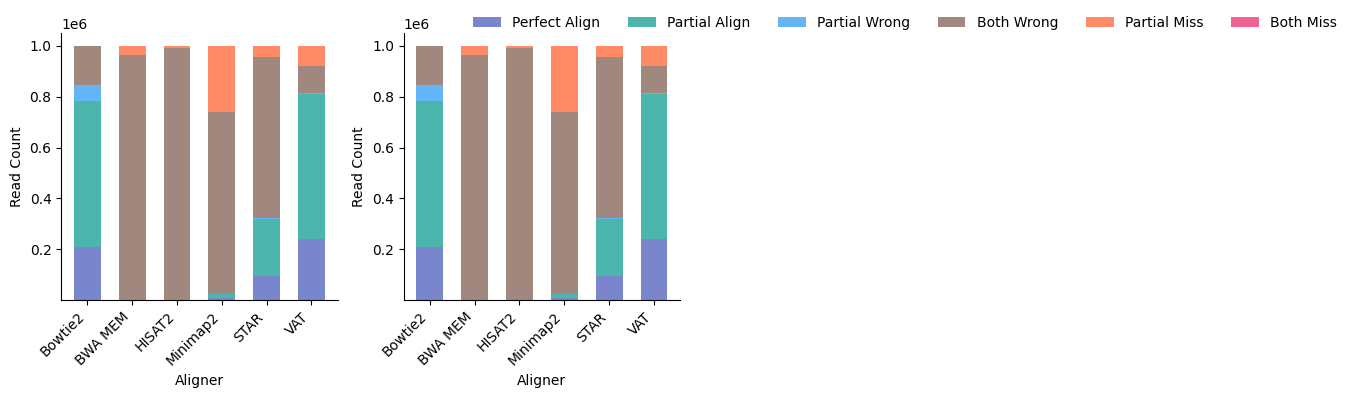

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Chimeric read mapping on simulated dataset (10.noInsert)
aligners = ["Minimap2", "BWA MEM", "Bowtie2", "STAR", "HISAT2", "VAT"]
perfect_noInsert = np.array([7061, 0, 209925, 95955, 2, 240392])
partial_aligned_noInsert = np.array([17274, 1, 571822, 224902, 1025, 569661])
partial_wrong_noInsert = np.array([997, 0, 65758, 1788, 1, 6542])
both_wrong_noInsert = np.array([714283, 965886, 152410, 632581, 989936, 104831])
partial_miss_noInsert = np.array([260355, 34083, 55, 44744, 9006, 78544])
both_miss_noInsert = np.array([30, 30, 30, 30, 30, 30])

# Data for Chimeric read mapping on simulated dataset (10.Insert)
perfect_insert = np.array([25260, 402, 194633, 161, 0, 354881])
partial_aligned_insert = np.array([50280, 412, 577150, 2091, 1890, 564683])
partial_wrong_insert = np.array([2882, 15, 63042, 7, 1, 4275])
both_wrong_insert = np.array([537652, 924610, 165117, 993882, 979293, 36289])
partial_miss_insert = np.array([383889, 74524, 21, 3822, 18779, 39835])
both_miss_insert = np.array([37, 37, 37, 37, 37, 37])

# Define the desired order of aligners
sorted_aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]

# Reorder data according to the specified aligner order
aligner_indices = [aligners.index(aligner) for aligner in sorted_aligners]

perfect_noInsert = perfect_noInsert[aligner_indices]
partial_aligned_noInsert = partial_aligned_noInsert[aligner_indices]
partial_wrong_noInsert = partial_wrong_noInsert[aligner_indices]
both_wrong_noInsert = both_wrong_noInsert[aligner_indices]
partial_miss_noInsert = partial_miss_noInsert[aligner_indices]
both_miss_noInsert = both_miss_noInsert[aligner_indices]

perfect_insert = perfect_insert[aligner_indices]
partial_aligned_insert = partial_aligned_insert[aligner_indices]
partial_wrong_insert = partial_wrong_insert[aligner_indices]
both_wrong_insert = both_wrong_insert[aligner_indices]
partial_miss_insert = partial_miss_insert[aligner_indices]
both_miss_insert = both_miss_insert[aligner_indices]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(7, 4), sharey=True)

bar_width = 0.6
x = np.arange(len(sorted_aligners))

# Stacked bars for 10.noInsert
axes[0].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[0].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[0].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[0].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[0].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[0].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[0].set_xticks(x)
axes[0].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[0].set_ylabel("Read Count")
axes[0].set_xlabel("Aligner")
# axes[0].set_title("Chimeric Read Mapping (20.noInsert)")
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

# Stacked bars for 20.Insert
axes[1].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
axes[1].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[1].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
axes[1].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
axes[1].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
axes[1].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
axes[1].set_xticks(x)
axes[1].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[1].set_ylabel("Read Count")
axes[1].set_xlabel("Aligner")
# axes[1].set_title("Chimeric Read Mapping (20.Insert)")
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].tick_params(labelleft=True)

# Move legend outside without border
# legend = axes[1].legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, frameon=False, bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


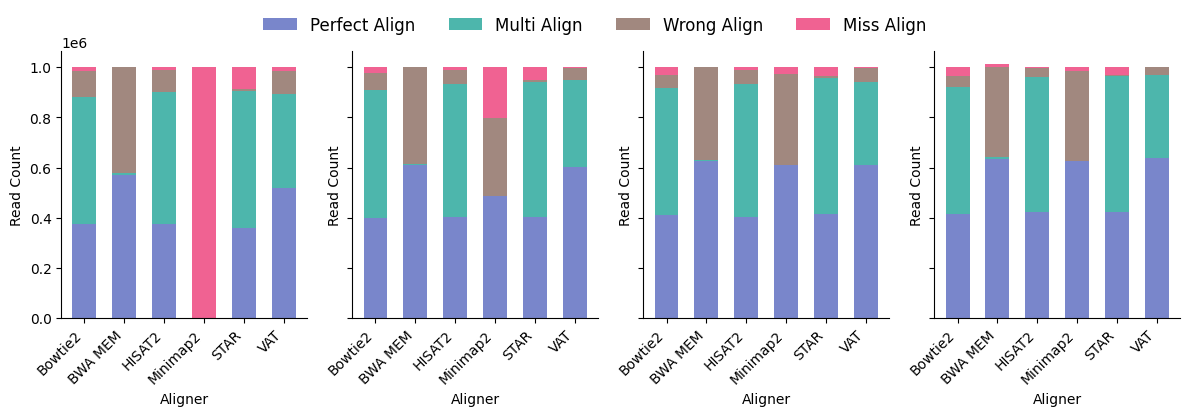

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define aligners
aligners = ["Minimap2", "BWA MEM", "Bowtie2", "STAR", "HISAT2", "VAT"]

# Data for Chimeric read mapping on simulated singular dataset (20)
perfect_20 = np.array([0, 572588, 375684, 360641, 376263, 518869])
multi_20 = np.array([0, 5589, 505557, 546505, 525915, 373594])
wrong_20 = np.array([0, 421776, 104961, 6202, 86421, 94754])
miss_20 = np.array([1000000, 47, 13798, 86652, 11401, 12783])
time_20 = np.array([40, 28, 90, 65, 14, 16])

# Data for Chimeric read mapping on simulated singular dataset (30)
perfect_30 = np.array([485263, 609410, 400471, 402001, 404229, 601889])
multi_30 = np.array([108, 5605, 508096, 540833, 530535, 346092])
wrong_30 = np.array([313061, 384985, 69930, 4808, 53208, 47381])
miss_30 = np.array([201568, 0, 21503, 52358, 12028, 4638])
time_30 = np.array([36, 33, 83, 107, 21, 34])

# Data for Chimeric read mapping on simulated singular dataset (40)
perfect_40 = np.array([609615, 626669, 411844, 416438, 404229, 610285])
multi_40 = np.array([179, 5903, 506910, 541763, 530535, 332427])
wrong_40 = np.array([362871, 367428, 52505, 5641, 53208, 55749])
miss_40 = np.array([27335, 0, 28741, 36158, 12028, 1539])
time_40 = np.array([36, 37, 84, 74, 21, 35])

# Data for Chimeric read mapping on simulated singular dataset (50)
perfect_50 = np.array([625149, 635142, 416193, 422927, 423446, 640051])
multi_50 = np.array([138, 6274, 504660, 541440, 539188, 329974])
wrong_50 = np.array([361013, 358584, 43322, 6221, 36375, 29509])
miss_50 = np.array([13700, 13700, 35825, 29412, 991, 466])
time_50 = np.array([40, 38, 82, 107, 24, 36])

# Define dataset names and corresponding data
datasets = ["20", "30", "40", "50"]
perfect = [perfect_20, perfect_30, perfect_40, perfect_50]
multi = [multi_20, multi_30, multi_40, multi_50]
wrong = [wrong_20, wrong_30, wrong_40, wrong_50]
miss = [miss_20, miss_30, miss_40, miss_50]
time = [time_20, time_30, time_40, time_50]

# Define sorted aligner order
sorted_aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]
aligner_indices = [aligners.index(aligner) for aligner in sorted_aligners]

# Reorder data according to sorted aligners
for i in range(len(datasets)):
    perfect[i] = perfect[i][aligner_indices]
    multi[i] = multi[i][aligner_indices]
    wrong[i] = wrong[i][aligner_indices]
    miss[i] = miss[i][aligner_indices]
    time[i] = time[i][aligner_indices]

# Plotting
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
# axes[0].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
# axes[0].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
# axes[0].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
# axes[0].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
# axes[0].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
# axes[0].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
bar_width = 0.6
x = np.arange(len(sorted_aligners))
colors = ["#7986CB", "#4DB6AC", "#A1887F", "#F06292"]
labels = ["Perfect Align", "Multi Align", "Wrong Align", "Miss Align"]

for i, dataset in enumerate(datasets):
    axes[i].bar(x, perfect[i], color=colors[0], label=labels[0], width=bar_width)
    axes[i].bar(x, multi[i], bottom=perfect[i], color=colors[1], label=labels[1], width=bar_width)
    axes[i].bar(x, wrong[i], bottom=perfect[i] + multi[i], color=colors[2], label=labels[2], width=bar_width)
    axes[i].bar(x, miss[i], bottom=perfect[i] + multi[i] + wrong[i], color=colors[3], label=labels[3], width=bar_width)
    
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(sorted_aligners, rotation=45, ha="right")
    axes[i].set_ylabel("Read Count")
    axes[i].set_xlabel("Aligner")
    # axes[i].set_title(f"Chimeric Read Mapping ({dataset})")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

# Move legend outside without border
# legend = axes[3].legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
# Create a horizontal legend across the top center of the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, frameon=False,fontsize='large', bbox_to_anchor=(0.5, 1.05))
plt.tight_layout()
plt.show()


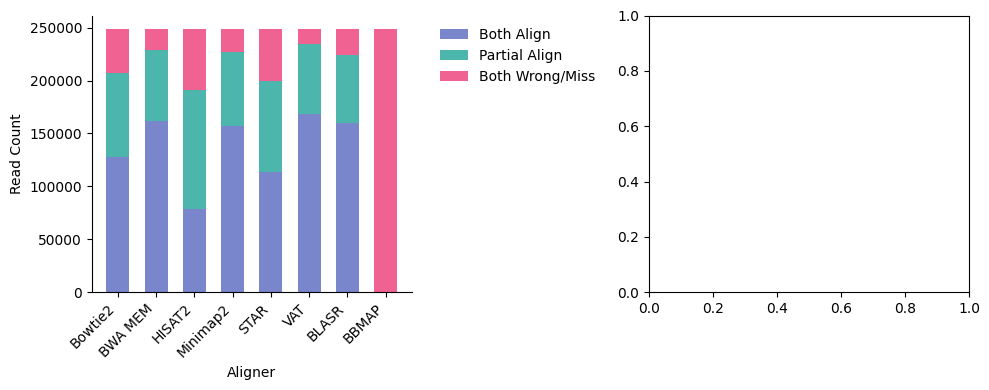

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Define aligners
aligners = ["Minimap2", "BWA MEM", "BLASR", "BBMAP", "Bowtie2", "STAR", "HISAT2", "VAT"]

# Data for HIC read mapping on simulated dataset (1000000)
both_align = np.array([157488, 161919, 159629, 0, 128136, 113348, 78787, 168718])
partial_align = np.array([69197, 66982, 64793, 0, 79246, 85985, 112273, 65893])
both_wrong_miss = np.array([22365, 20149, 24628, 249050, 41668, 49717, 57990, 14439])
time = np.array([137, 61, 2286, 234, 144, 45, 34, 48])
memory = np.array([16.5, 6.8, 29, 29, 3.5, 28, 4.2, 16])

# Define sorted aligner order
sorted_aligners = ["Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT", "BLASR", "BBMAP"]
aligner_indices = [aligners.index(aligner) for aligner in sorted_aligners]

# Reorder data according to sorted aligners
both_align = both_align[aligner_indices]
partial_align = partial_align[aligner_indices]
both_wrong_miss = both_wrong_miss[aligner_indices]
time = time[aligner_indices]
memory = memory[aligner_indices]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
bar_width = 0.6
x = np.arange(len(sorted_aligners))
# axes[0].bar(x, perfect_noInsert, color="#7986CB", label="Perfect Align", width=bar_width)
# axes[0].bar(x, partial_aligned_noInsert, bottom=perfect_noInsert, color="#4DB6AC", label="Partial Align", width=bar_width)
# axes[0].bar(x, partial_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert, color="#64B5F6", label="Partial Wrong", width=bar_width)
# axes[0].bar(x, both_wrong_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert, color="#A1887F", label="Both Wrong", width=bar_width)
# axes[0].bar(x, partial_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert, color="#FF8A65", label="Partial Miss", width=bar_width)
# axes[0].bar(x, both_miss_noInsert, bottom=perfect_noInsert + partial_aligned_noInsert + partial_wrong_noInsert + both_wrong_noInsert + partial_miss_noInsert, color="#F06292", label="Both Miss", width=bar_width)
# Stacked bars for alignment results
axes[0].bar(x, both_align, color="#7986CB", label="Both Align", width=bar_width)
axes[0].bar(x, partial_align, bottom=both_align, color="#4DB6AC", label="Partial Align", width=bar_width)
axes[0].bar(x, both_wrong_miss, bottom=both_align + partial_align, color="#F06292", label="Both Wrong/Miss", width=bar_width)
axes[0].set_xticks(x)
axes[0].set_xticklabels(sorted_aligners, rotation=45, ha="right")
axes[0].set_ylabel("Read Count")
axes[0].set_xlabel("Aligner")
# axes[0].set_title("HIC Read Mapping on Simulated Dataset (1000000)")
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Time and memory usage plot
# axes[1].bar(x, time, color="#ff7f00", label="Time (s)", width=bar_width)
# axes[1].bar(x, memory, bottom=time, color="#984ea3", label="Memory (GB)", width=bar_width)
# axes[1].set_xticks(x)
# axes[1].set_xticklabels(sorted_aligners, rotation=45, ha="right")
# axes[1].set_ylabel("Resource Usage")
# axes[1].set_xlabel("Aligner")
# axes[1].set_title("Time & Memory Usage")
# axes[1].spines["top"].set_visible(False)
# axes[1].spines["right"].set_visible(False)
# axes[1].legend(title="Resource Usage", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_12413/2861811787.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x="Aligner", y="Time (s)", data=df, ax=axes[0],
/tmp/ipykernel_12413/2861811787.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Aligner", y="Duplex", data=df, ax=axes[1],
/tmp/ipykernel_12413/2861811787.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Aligner", y="Singular", data=df, ax=axes[2],
/tmp/ipykernel_12413/2861811787.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

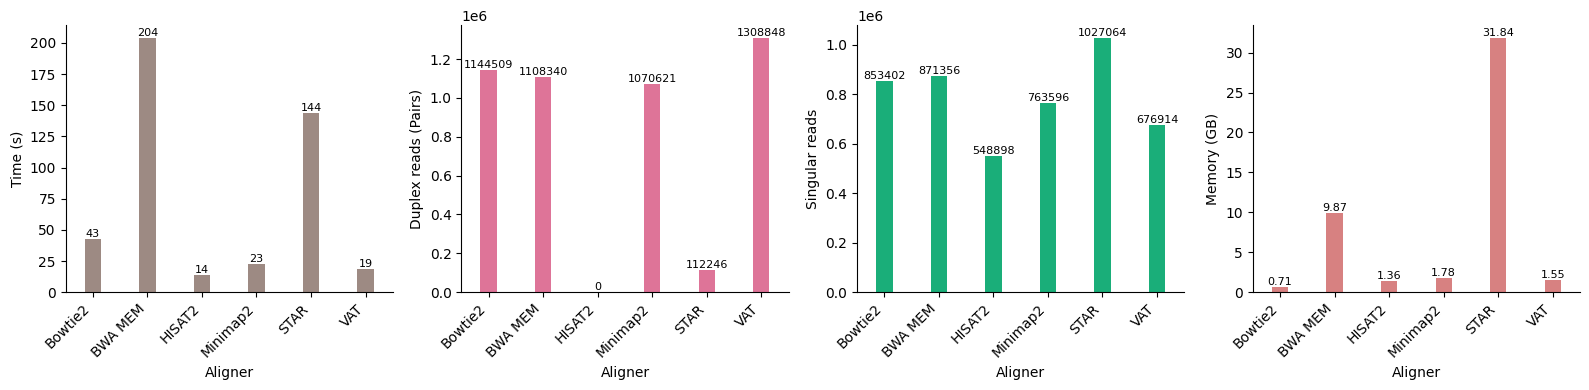

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for Chimeric read mapping on SRR959751
data = {
    "Aligner": ["Minimap2", "BWA MEM", "Bowtie2", "STAR", "HISAT2", "VAT"],
    "Time (s)": [23, 204, 43, 144, 14, 19],
    "Duplex": [1070621, 1108340, 1144509, 112246, 0, 1308848],
    "Singular": [763596, 871356, 853402, 1027064, 548898, 676914],
    "Memory (KB)": [1863596, 10351664, 744048, 33389312, 1422648, 1627368]
}

df = pd.DataFrame(data)

# Convert Memory from KB to GB (1 GB = 1024*1024 KB)
df["Memory (GB)"] = df["Memory (KB)"] / (1024 * 1024)

# Define the desired order
sorted_order = ["Bowtie2", "BWA MEM", "HISAT2", "Minimap2", "STAR", "VAT"]
df = df.set_index("Aligner").loc[sorted_order].reset_index()
recall_colors = {aligner: "#81C784" for aligner in aligners}

memory_colors = {aligner: color for aligner, color in zip(aligners, ["#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373", "#E57373"])}

speed_colors = {aligner: color for aligner, color in zip(aligners, ["#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F", "#A1887F"])}

cover_colors = {aligner: color for aligner, color in zip(aligners, ["#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8", "#BA68C8"])}

al_cover_colors = {aligner: color for aligner, color in zip(aligners, ["#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292", "#F06292"])}

singluar_colors = {aligner: color for aligner, color in zip(aligners, ["#01C780", "#01C780", "#01C780", "#01C780", "#01C780", "#01C780", "#01C780", "#01C780", "#01C780", "#01C780", "#01C780"])}


# Define a color dictionary for the aligners (consistent across plots)
aligner_colors = {
    "Minimap2": "#E57373", 
    "BWA MEM": "#FFB74D",
    "Bowtie2": "#01C780",
    "STAR": "#4DB6AC",
    "HISAT2": "#64B5F6",
    "VAT": "#BA68C8"
}

# Function to annotate bars with their height values
def add_labels(ax, fmt="{:.0f}"):
    for p in ax.patches:
        ax.annotate(fmt.format(p.get_height()), 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Set up a 1x4 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Time plot
ax0 = sns.barplot(x="Aligner", y="Time (s)", data=df, ax=axes[0],
                  palette=[speed_colors[a] for a in df["Aligner"]],
                  width=0.3)
# ax0.set_title("Mapping Time (s)")
ax0.set_ylabel("Time (s)")
ax0.set_xlabel("Aligner")
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
add_labels(ax0)

# Duplex plot
ax1 = sns.barplot(x="Aligner", y="Duplex", data=df, ax=axes[1],
                  palette=[al_cover_colors[a] for a in df["Aligner"]],
                  width=0.3)
# ax1.set_title("Duplex Aligned Reads")
ax1.set_ylabel("Duplex reads (Pairs)")
ax1.set_xlabel("Aligner")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
add_labels(ax1)

# Singular plot
ax2 = sns.barplot(x="Aligner", y="Singular", data=df, ax=axes[2],
                  palette=[singluar_colors[a] for a in df["Aligner"]],
                  width=0.3)
# ax2.set_title("Singular Aligned Reads")
ax2.set_ylabel("Singular reads")
ax2.set_xlabel("Aligner")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
add_labels(ax2)

# Memory plot (converted to GB)
ax3 = sns.barplot(x="Aligner", y="Memory (GB)", data=df, ax=axes[3],
                  palette=[memory_colors[a] for a in df["Aligner"]],
                  width=0.3)
# ax3.set_title("Memory usage (GB)")
ax3.set_ylabel("Memory (GB)")
ax3.set_xlabel("Aligner")
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
add_labels(ax3, fmt="{:.2f}")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()
